# KMeans from scratch

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Algorithm
**Input:**  
- `X`: an array of shape `(N,d)` whose rows are samples and columns are features
- `k`: number of clusters
- `init`: "random" or an array of shape (k,d)  
if "random", `k` points are chosen randomly from X as the initial cluster centers  
if an array, the array is used as the initial cluster centers

**Output:**  
A tuple `(y_new, centers)`.  
- `y_new`: an array of shape `(N,)` that records the labels in `(0, ..., k-1)` of each sample 
- `centers`: an array of shape `(k,d)` that records the cluster centers

**Steps:**
1. Initialize a collection of centers $\mu_0,\ldots,\mu_{k-1}$:  
    - if `init` is an array, the centers are the rows of `init` . 
    - if `init=="random"`, the centers are chosen as `k` random rows of `X` .  
2. Label each sample ${\bf x}_i$ by $j$ if $\mu_j$ is the closed center to ${\bf x}_i$.
3. Call the points with label $j$ as group $j$.  Update $\mu_j$ as the center of points in group $j$.  
4. Repeat Steps 2 and 3 until `y_new` do not change anymore.

## Pseudocode
Translate the algorithm into the pseudocode.  
This helps you to identify the parts that you don't know how to do it.  

    1. 
    2. 
    3. ...

## Code

- `X`: an array of shape `(N,d)` whose rows are samples and columns are features
- `k`: number of clusters
- `init`: "random" or an array of shape (k,d)  

In [2]:
def distance_matrix(X, Y=None):
    """Return the distance matrix between rows of X and rows of Y
    
    Input:  
        X: an array of shape (N,d)
        Y: an array of shape (M,d)
            if None, Y = X
           
    Output:
        the matrix [d_ij] where d_ij is the distance between  
        the i-th row of X and the j-th row of Y
    """
    if isinstance(Y, np.ndarray):
        pass
    elif Y == None:
        Y = X.copy()
    else:
        raise TypeError("Y should be a NumPy array or None") 
    X_col = X[:, np.newaxis, :]
    Y_row = Y[np.newaxis, :, :]
    diff = X_col - Y_row
    dist = np.sqrt(np.sum(diff**2, axis=-1))
    
    return dist

In [3]:
# Function to implement the four Steps in the KMeans Algo
def KMeans_from_scratch(X, k, init = "random"):
    # Step 1: Choosing centers randomly
    N = len(X) ; inds = 0
    if init == "random": # the centers are chosen as k random rows of X
        inds = np.random.choice(range(N), k, replace=False)    
        centers = X[inds, :]
    else: # if init is an array, the centers are the rows of init
        centers = init
    y_new = np.zeros(N) # label y_new with 0
    
    # Step 2: Finding the distance bet. centers and data points
    dist = distance_matrix(X, centers)
    
    # Step 3: Center w/the min. distance
    y_new = np.argmin(dist, axis = 1) # Returns the indices of the minimum values along an axis,
                                      # axis 1 is the axis that runs horizontally across the columns, 
                                      # in this case col of dist
    label = np.array([-1 for i in range(N)]) # label all the points until the label result is same as before
     
    # Step 4: Repeat Steps 2 and 3 until y_new do not change anymore
    while not np.array_equal(y_new, label):
        label = np.copy(y_new) ; centers = []
        for inds in range(k):
            # Updating centers by the ave. of cluster it belongs to
            temp_cent = X[y_new==inds].mean(axis=0) 
            centers.append(temp_cent)
 
        centers = np.vstack(centers) # updated centers
         
        dist = distance_matrix(X, centers)
        y_new = np.argmin(dist, axis = 1)
         
    return y_new, centers

## Test
Take some sample data from [KMeans-with-scikit-learn](KMeans-with-scikit-learn.ipynb) and check if your code generates similar outputs with the existing packages.

##### Name of the data
***Description of the data:***  
X dataset is a 2D array with a shape of (200, 2).  
Two sets of random samples were obtained from a multivariate normal distribution,  
in which the distribution is specified by its mean and covariance matrix.  
These two sets of random samples are vertically stacked together.  

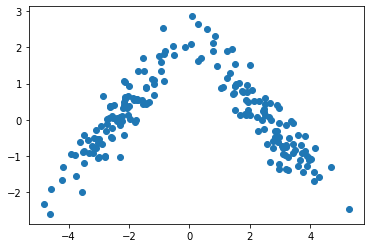

In [4]:
### Similar data from KMeans-with-scikit-learn.ipynb
np.random.seed(0)
mu1 = np.array([2.5,0])
cov1 = np.array([[1.1,-1],
                [-1,1.1]])
mu2 = np.array([-2.5,0])
cov2 = np.array([[1.1,1],
                [1,1.1]])
X = np.vstack([np.random.multivariate_normal(mu1, cov1, 100), 
               np.random.multivariate_normal(mu2, cov2, 100)])
plt.scatter(X[:,0], X[:,1])

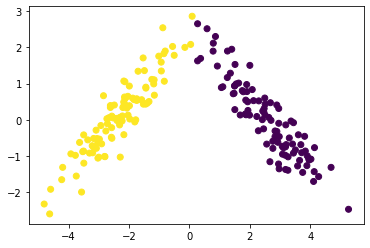

In [5]:
### results with your code
label, center = KMeans_from_scratch(X, 2)
plt.scatter(X[:,0], X[:,1], c=label)

430.155984431279


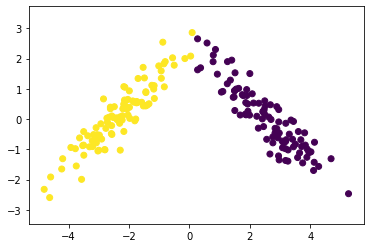

In [6]:
### results with existing packages
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
y_new = model.fit_predict(X)

%matplotlib inline
plt.axis('equal')
plt.scatter(*X.T, c=y_new)
print(model.inertia_) # Sum of squared distances of samples to their closest cluster center.

## Comparison

##### Exercise 1
Modify your code so that it prints the inertia at each iteration.  
Is it decreasing?

In [7]:
# Function to implement the four Steps in the KMeans Algo
def KMeans_with_inertia(X, k, init = "random", verbose = None):
    # Step 1: Choosing centers randomly
    N = len(X) ; inds = 0
    if init == "random": # the centers are chosen as k random rows of X
        inds = np.random.choice(range(N), k, replace=False)    
        centers = X[inds, :]
    else: # if init is an array, the centers are the rows of init
        centers = init
    y_new = np.zeros(N) # label y_new with 0
    
    # Step 2: Finding the distance bet. centers and data points
    dist = distance_matrix(X, centers)
    
    # Step 3: Center w/the min. distance
    y_new = np.argmin(dist, axis = 1) # Returns the indices of the minimum values along an axis,
                                      # axis 1 is the axis that runs horizontally across the columns, 
                                      # in this case col of dist
    label = np.array([-1 for i in range(N)]) # label all the points until the label result is same as before
    
    inertia_list = [] # list to store inertia
    # Step 4: Repeat Steps 2 and 3 until y_new do not change anymore
    while not np.array_equal(y_new, label):
        label = np.copy(y_new) ; centers = []
        for inds in range(k):
            # Updating centers by the ave. of cluster it belongs to
            temp_cent = X[y_new==inds].mean(axis=0) 
            centers.append(temp_cent)
 
        centers = np.vstack(centers) # updated centers
         
        dist = distance_matrix(X, centers)
        y_new = np.argmin(dist, axis = 1)

        # Inertia iteration
        inertia = np.sum(np.min(dist, axis=1)**2)
        if verbose == True: # detailed iteration of inertia, kind of similar to verbose parameter in KMeans()
            inertia_list.append(inertia)
            
    for idx, item in enumerate(inertia_list): # iterate and prints the index-value pair of inertia_list
        print("Iteration", idx, "inertia", item) # kind of similar to verbose parameter in KMeans()
        
    if verbose == False: # will only print the last iteration of inertia
        print("inertia is", inertia) # kind of similar to KMeans.inertia_

    return y_new, centers

Iteration 0 inertia 339.76372571682384
Iteration 1 inertia 288.7032060527051
Iteration 2 inertia 278.68820638114244
Iteration 3 inertia 273.5554932563148
Iteration 4 inertia 272.6059728645098
Iteration 5 inertia 270.92161357231066
Iteration 6 inertia 269.0568492231027
Iteration 7 inertia 267.18022525383446
Iteration 8 inertia 266.36283797870993
Iteration 9 inertia 265.1619881162061
Iteration 10 inertia 264.2629484459714
Iteration 11 inertia 263.58300463526336
Iteration 12 inertia 260.5872096236334
Iteration 13 inertia 258.2460916958044
Iteration 14 inertia 257.1128243855393
Iteration 15 inertia 255.64536870598806
Iteration 16 inertia 253.38003366437607
Iteration 17 inertia 252.73324263692476
Iteration 18 inertia 251.9464511805029
Iteration 19 inertia 251.28772272353237
Iteration 20 inertia 250.75409973769885
Iteration 21 inertia 250.35492320273642
Iteration 22 inertia 249.99735962044898

 The inertia is decreasing


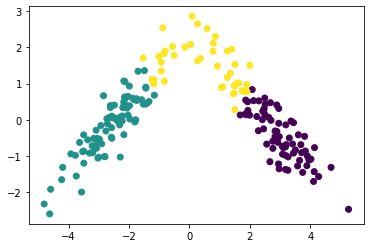

In [8]:
### results with your code
label, center = KMeans_with_inertia(X, 3, verbose = True)
plt.scatter(X[:,0], X[:,1], c=label )
print("\n The inertia is decreasing")

verbose = False
inertia is 249.99735962044898


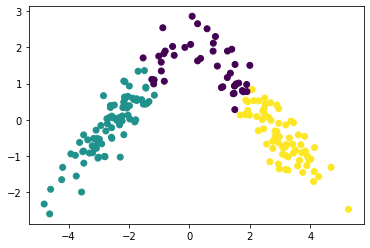

In [9]:
### results with your code, test verbose = False
print("verbose = False")
label, center = KMeans_with_inertia(X, 3, verbose = False)
plt.scatter(X[:,0], X[:,1], c=label )

##### Exercise 2
Let  
```python
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y_iris = iris.target
```

###### 2(a)
Use your function to apply the $k$-means algorithm with $k=3$.  
What is the inertia?  
Run it several times to see if the results are always the same.  

In [10]:
### your answer here
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y_iris = iris.target

print("Inertia by KMeans_with_inertia: \n")

for i in range(10):
    print("Run number:", i+1)
    label, center = KMeans_with_inertia(X, 3, verbose = False)
    
print("\nUsing KMeans_with_inertia, the resulting inertia is not always the same.")
print("This is because of the randomized initialized centers.")

Inertia by KMeans_with_inertia: 

Run number: 1
inertia is 78.85144142614601
Run number: 2
inertia is 78.85144142614601
Run number: 3
inertia is 142.7540625
Run number: 4
inertia is 78.85144142614601
Run number: 5
inertia is 78.8556658259773
Run number: 6
inertia is 78.8556658259773
Run number: 7
inertia is 145.4526917648503
Run number: 8
inertia is 78.85144142614601
Run number: 9
inertia is 78.8556658259773
Run number: 10
inertia is 78.8556658259773

Using KMeans_with_inertia, the resulting inertia is not always the same.
This is because of the randomized initialized centers.


###### 2(b)
Use `sklearn.cluster.KMeans` to apply the $k$-means algorithm with $k=3$.  
What is the inertia?  
Run it several times to see if the results are always the same.  

In [11]:
### your answer here
print("Inertia by model.inertia_: \n")

for i in range(10):
    model = KMeans(n_clusters=3)
    model.fit(X)
    print("Run number:", i+1)
    print("inertia is", model.inertia_)
    
print("\nUsing sklearn.cluster.KMeans, the obtained inertia values are always the same.")
print("This happens because the function will run the 𝑘-means algo n_init times to get the best performance.")
print("In which the final results will be the best output of n_init consecutive runs in terms of inertia.")

Inertia by model.inertia_: 

Run number: 1
inertia is 78.851441426146
Run number: 2
inertia is 78.851441426146
Run number: 3
inertia is 78.851441426146
Run number: 4
inertia is 78.851441426146
Run number: 5
inertia is 78.851441426146
Run number: 6
inertia is 78.851441426146
Run number: 7
inertia is 78.851441426146
Run number: 8
inertia is 78.851441426146
Run number: 9
inertia is 78.851441426146
Run number: 10
inertia is 78.851441426146

Using sklearn.cluster.KMeans, the obtained inertia values are always the same.
This happens because the function will run the 𝑘-means algo n_init times to get the best performance.
In which the final results will be the best output of n_init consecutive runs in terms of inertia.


In [12]:
### n_init test
### your answer here
n_init_var = 1
print("Inertia by model.inertia_:")
print("n_init:", n_init_var, "\n")

for i in range(10):
    model = KMeans(n_clusters=3, n_init=n_init_var)
    model.fit(X)
    print("Run number:", i+1)
    print("inertia is", model.inertia_)
    
print("\nVarying the n_init parameter in sklearn.cluster.KMeans, such as reducing its value,")
print("would also reduce the probability of getting the best output.")
print("Therefore, the results for each iteration would somehow be slightly different.")

Inertia by model.inertia_:
n_init: 1 

Run number: 1
inertia is 78.851441426146
Run number: 2
inertia is 78.85566582597727
Run number: 3
inertia is 78.851441426146
Run number: 4
inertia is 78.851441426146
Run number: 5
inertia is 78.851441426146
Run number: 6
inertia is 78.85566582597727
Run number: 7
inertia is 78.85566582597727
Run number: 8
inertia is 142.7540625000001
Run number: 9
inertia is 78.85566582597727
Run number: 10
inertia is 78.85566582597727

Varying the n_init parameter in sklearn.cluster.KMeans, such as reducing its value,
would also reduce the probability of getting the best output.
Therefore, the results for each iteration would somehow be slightly different.


###### 2(c)
Pick a label `labels` that you like.  
Compute the cluster centers of `X` corresponding to `labels` .  
Is this inertia bigger or smaller than the previous two answers?

In [13]:
### your answer here
labels = np.random.randint(3, size=len(X))
random_inertia = 0

for i in range(3):
    mask = np.where(labels == i)
    X_labels = X[mask]
    centers = np.mean(X_labels, axis = 0)
    random_inertia += np.sum((X_labels-centers)**2)

print("random inertia: ", random_inertia)
print("The random inertia is way bigger than the previous two answers.")

random inertia:  674.9114772654344
The random inertia is way bigger than the previous two answers.


###### 2(d)
The label `y_iris` is the "correct" real-world answer.  
Compute the cluster centers and the inertia.  
Is this inertia bigger or smaller than the answers in 2(a) and 2(b)?

In [14]:
### your answer here
correct_inertia = 0

for i in range(3):
    mask_iris = np.where(y_iris == i)
    X_labels = X[mask_iris]
    centers = np.mean(X_labels, axis = 0)    
    correct_inertia += np.sum((X_labels-centers)**2)    

print("correct inertia: ", correct_inertia)
print("Comparing to 2(a), it is either bigger or smaller.")
print("Comparing to 2(b), it is slightly bigger.")

correct inertia:  89.29740000000001
Comparing to 2(a), it is either bigger or smaller.
Comparing to 2(b), it is slightly bigger.


##### Exercise 3
The $k$-means algorithm is a deterministic algorithm once the initial cluster centers have been determined.  
Therefore, your function and `sklearn.cluster.KMeans` should obtain the same result when `init` is given.  
Check if this is true.  

Note:  There are still many subtle differences, for example, `sklearn` uses the location of centers to test the convergence but our algorithm uses the label to test the convergence.

In [15]:
### your answer here
import warnings # for Exer 3 only
# warnings.filterwarnings("ignore") # ignores all error, not advisable
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

row = X.shape[0]

for i in range(3):
    init = np.array([X[np.random.randint(row)], X[np.random.randint(row)], X[np.random.randint(row)]])
    print("Run number:", i+1)
    ### by sklearn KMeans
    model = KMeans(n_clusters=3, init = init)
    model.fit(X)
    print("labels by sklearn KMeans: \n", model.labels_)
    ### by KMeans from scratch
    label, center = KMeans_from_scratch(X, 3, init = init)
    print("labels by KMeans from scratch: \n", label)
    ### Boolean operation to check if the same
    print("sklearn KMeans vs KMeans from scratch:", np.allclose(model.labels_, label))
    
print("\nAs expected, when init is given, KMeans_from_scratch and sklearn.cluster.KMeans obtained the same results.")
print("Which is also supported by Boolean checking.")

Run number: 1
labels by sklearn KMeans: 
 [1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 1 1 0 0 1 1 0 1 0 1 1 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
labels by KMeans from scratch: 
 [1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1
 1 0 1 1 0 0 1 1 0 1 0 1 1 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
sklearn KMeans vs KMeans from scratch: True
Run number: 2
labels by sklearn KMeans: 
 [1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1
 1 0 1 1 0 0 1 1 0 1 0 1 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2